# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | minas de marcona
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | moyale
Processing Record 9 of Set 1 | belyy yar
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 16 of Set 1 | sisimiut
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | klyuchi
Processing Record 21 of Set 1 | atafu villag

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,27.03,74,75,5.14,CK,1733182209
1,jamestown,42.0970,-79.2353,-2.20,96,100,5.66,US,1733181951
2,albany,42.6001,-73.9662,-0.64,56,41,2.30,US,1733182141
3,guerrero negro,27.9769,-114.0611,19.09,62,57,4.64,MX,1733182216
4,grytviken,-54.2811,-36.5092,1.59,99,100,3.35,GS,1733182218


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,27.03,74,75,5.14,CK,1733182209
1,jamestown,42.0970,-79.2353,-2.20,96,100,5.66,US,1733181951
2,albany,42.6001,-73.9662,-0.64,56,41,2.30,US,1733182141
3,guerrero negro,27.9769,-114.0611,19.09,62,57,4.64,MX,1733182216
4,grytviken,-54.2811,-36.5092,1.59,99,100,3.35,GS,1733182218


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

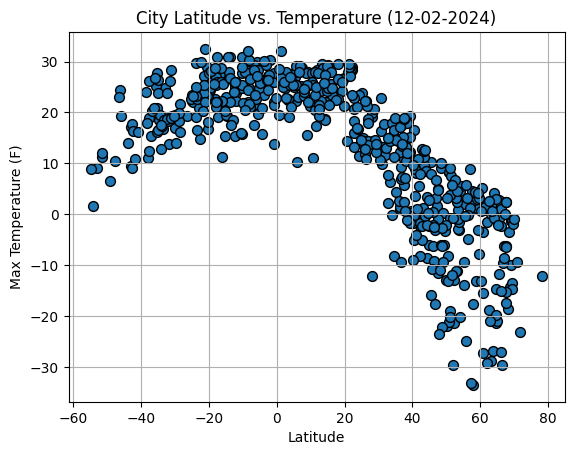

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    label="Cities",
    s=50
    

)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

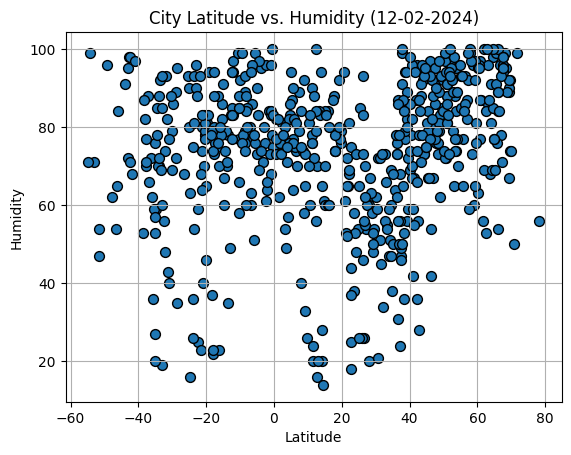

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    label="Cities",
    s=50
    

)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

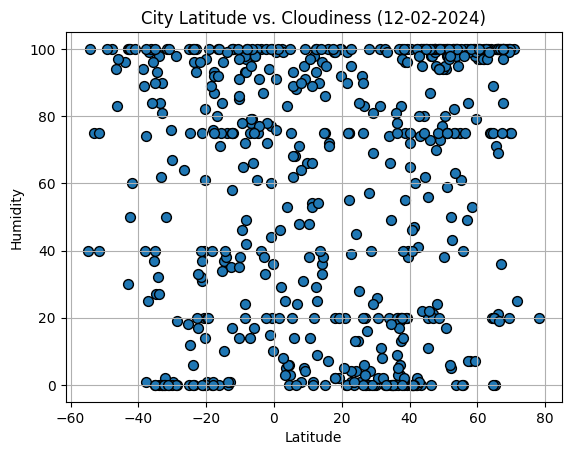

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    label="Cities",
    s=50
    

)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

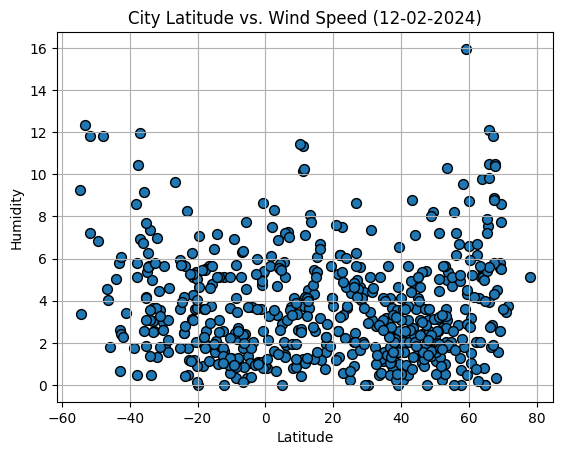

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    label="Cities",
    s=50
    

)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    (slope, intercept, rvalue, value, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept 
    line_eq = "y = " + str(round(slope, 2)) + "X + " + str(round(intercept, 2))


    plt.scatter(x_values,y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,-2.20,96,100,5.66,US,1733181951
2,albany,42.6001,-73.9662,-0.64,56,41,2.30,US,1733182141
3,guerrero negro,27.9769,-114.0611,19.09,62,57,4.64,MX,1733182216
6,tiksi,71.6872,128.8694,-23.08,99,25,3.75,RU,1733182222
7,moyale,3.5167,39.0584,19.20,49,5,3.34,KE,1733182225


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,27.03,74,75,5.14,CK,1733182209
4,grytviken,-54.2811,-36.5092,1.59,99,100,3.35,GS,1733182218
5,minas de marcona,-15.2119,-75.1103,15.46,86,84,6.47,PE,1733182220
9,san antonio de pale,-1.4014,5.6325,25.99,84,94,3.59,GQ,1733182229
10,waitangi,-43.9535,-176.5597,14.03,91,96,5.03,NZ,1733182231


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.6818403227952123


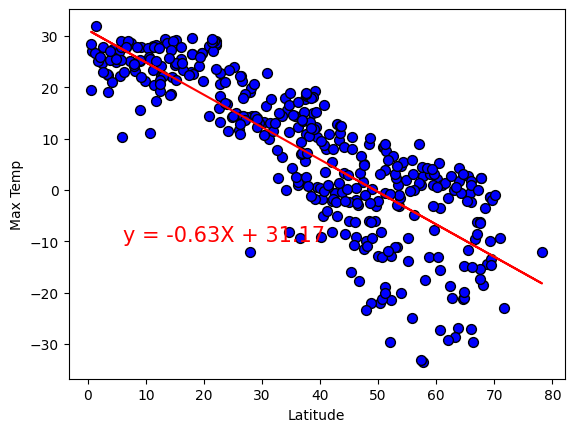

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10), "blue")

The r-value is 0.3525698035870858


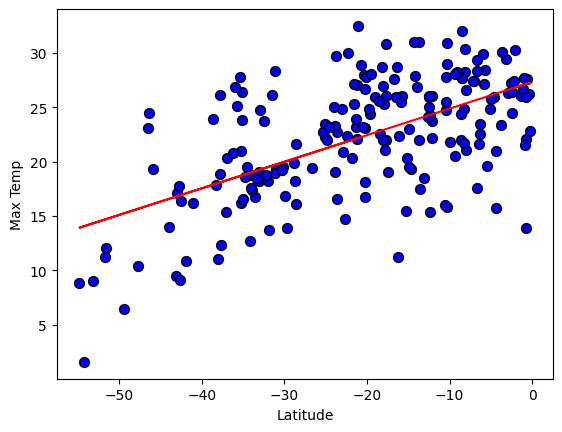

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-55,90), "blue")

**Discussion about the linear relationship:** Northern hemisphere r is 0.72 indicates stong correlation. Southern hemisphere r value is .40 indicating a weak correlation. There is a strong correlation between latitude and temperature in the northern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.12477854647570404


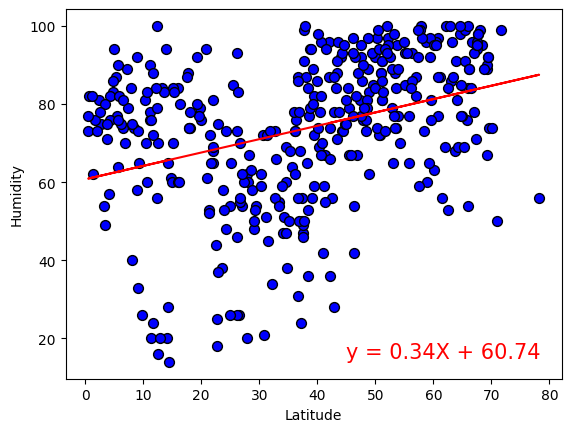

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(45,15), "blue")

The r-value is 0.03072924409807379


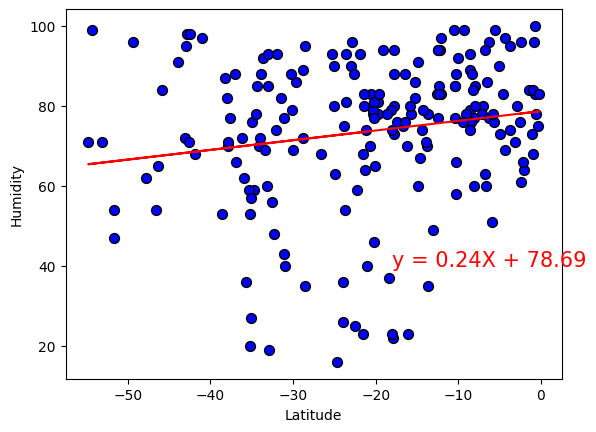

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-18,40), "blue")

**Discussion about the linear relationship:** Northern Hemisphere has an r of .06 making it a weak correlation between latitude and humidity. Southern Hemisphere has an r of .01 also making it a weak correlation between latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.0747542575098512


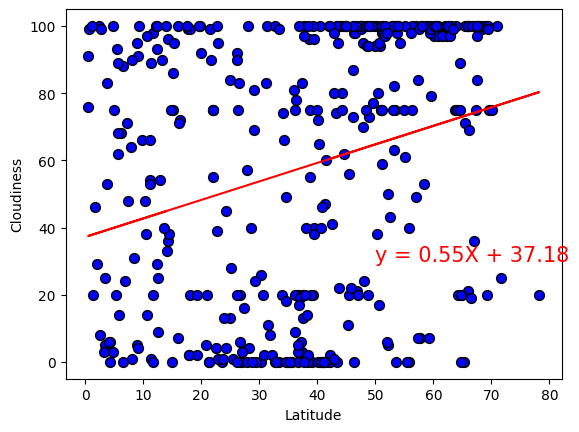

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(50,30), "blue")

The r-value is 0.00029307210749970186


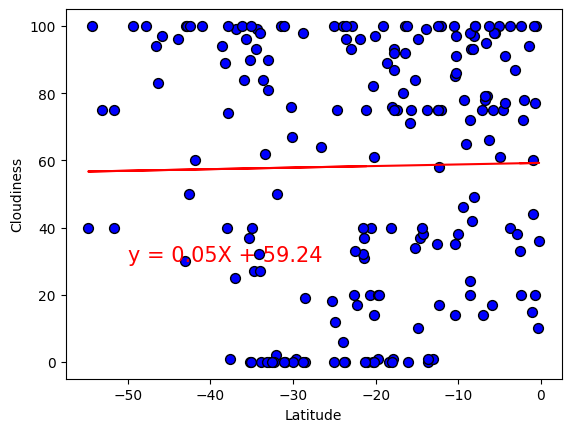

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-50,30), "blue")

**Discussion about the linear relationship:** Northern Hemisphere has an r value of .02 indicating a weak correlation between latitude and cloudiness. Southern Hemisphere has an r value of .03 indicating a weak correlation between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.005222690900330508


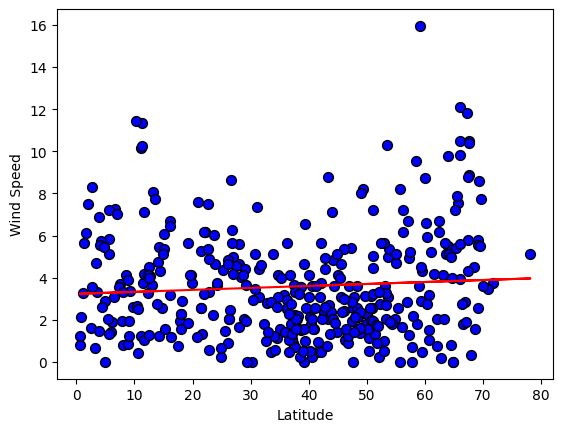

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(50,30), "blue")

The r-value is 0.1433779236167468


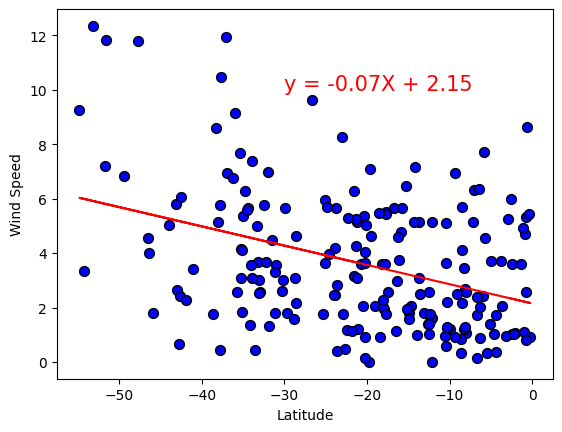

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-30,10), "blue")

**Discussion about the linear relationship:** Northern Hemisphere has an r value of .0003 indicating no correlation between latitude and wind speed. Southern Hemisphere has an r value of .05 indicating a weak correlation between latitude and wind speed. 